<a href="https://colab.research.google.com/github/AnilSharma09/ML-PROJECT/blob/main/Task_2_Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# ====== METHOD 1: Manual File Upload (Google Colab/Jupyter) ======
from google.colab import files  # Only for Colab
uploaded = files.upload()  # Upload 'train.csv' manually
data = pd.read_csv('Mall_Customers.csv')

# ====== METHOD 2: Specify Correct File Path ======
# data = pd.read_csv(r'C:\Users\YourName\Downloads\train.csv')  # Windows
# data = pd.read_csv('/content/train.csv')  # Linux/Colab

# ====== METHOD 3: Download from Kaggle Directly (Colab) ======
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !kaggle competitions download -c house-prices-advanced-regression-techniques
# !unzip train.csv.zip
# data = pd.read_csv('train.csv')

print("Data loaded successfully! Preview:")
print(data.head())



Saving Mall_Customers.csv to Mall_Customers (1).csv
Data loaded successfully! Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('Mall_Customers.csv')  # Renamed from Kaggle
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


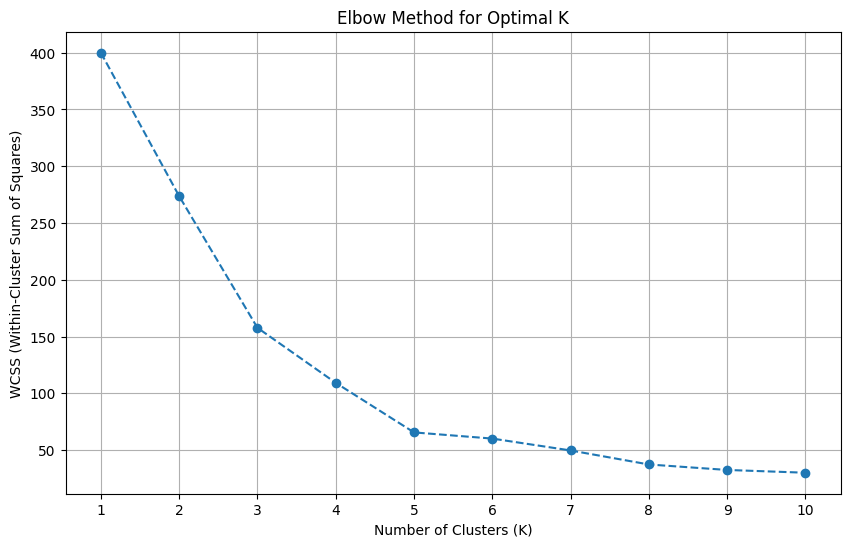

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal K using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [ ]:
# Choose K=5 (from Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to original data
df['Cluster'] = clusters
print("\nCluster distribution:\n", df['Cluster'].value_counts())


Cluster distribution:
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


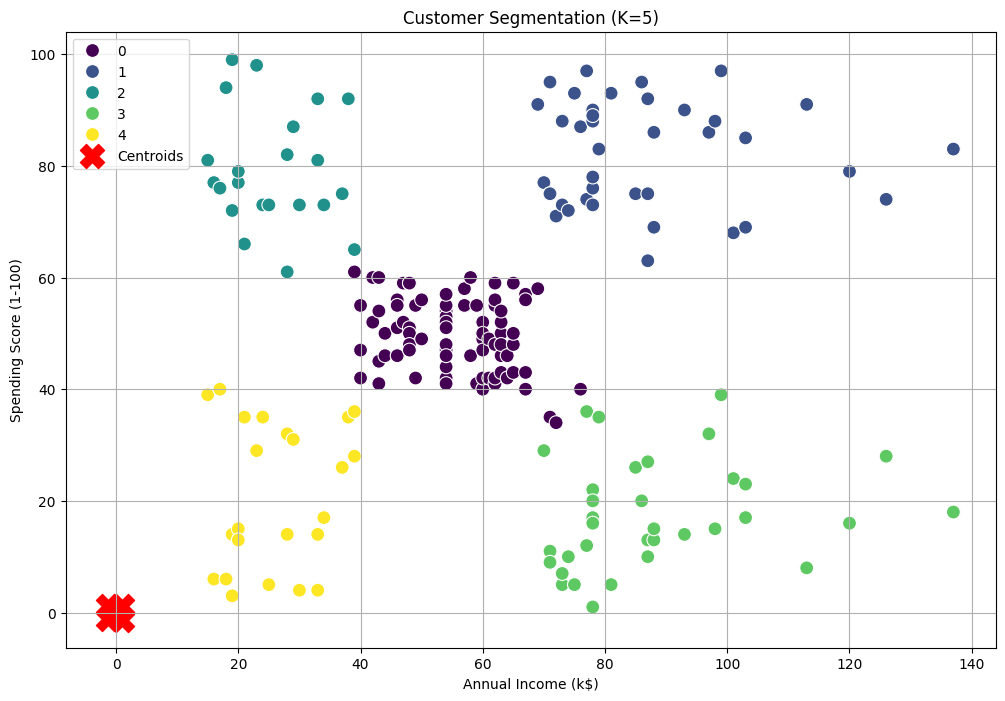

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300, c='red', marker='X', label='Centroids'
)
plt.title('Customer Segmentation (K=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median'],
    'Age': 'count'
}).rename(columns={'Age': 'Count'})

print("\nCluster Profiles:\n", cluster_summary)


Cluster Profiles:
         Annual Income (k$)        Spending Score (1-100)        Count
                      mean median                   mean median count
Cluster                                                              
0                55.296296   54.0              49.518519   50.0    81
1                86.538462   79.0              82.128205   83.0    39
2                25.727273   24.5              79.363636   77.0    22
3                88.200000   85.0              17.114286   16.0    35
4                26.304348   25.0              20.913043   17.0    23
